### _imports_

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import os
import re

from collections import Counter

# 1. Meduza

_Я не стал парсить текст "ххх минут назад", чтобы построить точную гистограмму по времени, потому что это не совсем тема данной работы (а похожую задачу мы уже решали в_ [_прошлом ДЗ_](https://github.com/rklepov/data_mining_course2/blob/homework/07_xml_and_visualization/Hw/Homework_8.ipynb) _- возраст живатоных)._

In [2]:
response = requests.get('https://meduza.io/')
soup = BeautifulSoup(response.text, 'html.parser')

In [3]:
when = pd.DataFrame(columns=['when', 'count'],
                    data=Counter([ time.text for time in soup.find_all('time', {'class': 'Timestamp-root'}) ]).most_common())

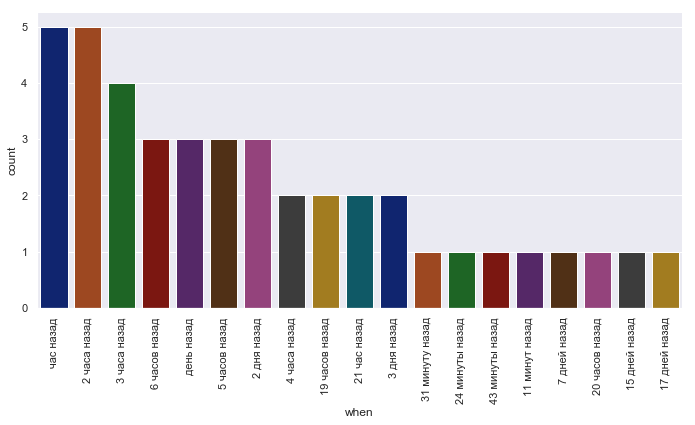

In [4]:
sns.set()
g = sns.catplot(x='when', y='count', data=when, kind='bar', height=5, aspect=2, palette='dark')
g.set_xticklabels(rotation = 90);

# 2. StarWars

_Данная задача плохо воспроизводится, потому что Яндекс банит(_

In [5]:
# обходим блокировку через Тор
import socks
import socket

# !pip install fake_useragent
from fake_useragent import UserAgent

socks.set_default_proxy(socks.SOCKS5, "localhost", 9150)
if not socket.socket is socks.socksocket: 
    _socket = socket.socket
    socket.socket = socks.socksocket

ua = UserAgent()

# torrc
# MaxCircuitDirtiness 10

In [6]:
os.makedirs('StarWars', exist_ok=True)

In [7]:
def get_sw_poster_previews(page):
    headers = {'User-Agent' : ua.random}
    response = requests.get('https://www.kinopoisk.ru/film/718223/posters/page/{}/'.format(page), headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    return [ img for img in soup.find_all('img', {'src' : True}) if 'poster' in img.attrs['src'] ]

In [8]:
img_previews = list(get_sw_poster_previews(1))
img_previews.extend(get_sw_poster_previews(2))
print(len(img_previews))

85


In [12]:
def get_sw_poster_img(url):
    headers = {'User-Agent' : ua.random}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    img = soup.find('img', {'id' : 'image', 'onclick' : True})
#     time.sleep(15+np.random.random())
#     print(img)
    return img

In [ ]:
images = [ get_sw_poster_img('https://www.kinopoisk.ru{}'.format(img.parent['href'])) 
              for img in img_previews if 'picture' in img.parent['href'] ]

In [14]:
len([ img['src'] for img in images if not img is None ])

78

In [ ]:
for poster_url in [ img['src'] for img in images if not img is None ]:
    headers = {'User-Agent' : ua.random}
#     print(poster_url)
    poster = requests.get(poster_url, headers=headers)
    if 200 != poster.status_code:
        continue
    with open('{}/{}'.format('StarWars', poster_url.split('/')[-1]), 'wb') as poster_fd:
        poster_fd.write(poster.content)
#     time.sleep(15+np.random.random())

![](StarWars/kinopoisk.ru-Star-Wars_3A-Episode-VIII-The-Last-Jedi-3061146.jpg)

# 3. auto.ru

In [17]:
# auto.ru наоборот не работает черех proxy, требует принять какое-то соглашение
socket.socket = _socket

In [18]:
headers = {'User-Agent' : ua.random}
response = requests.get('https://auto.ru/', headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

In [19]:
items = soup.find_all('a', {'class' : 'IndexMarks__item'})

# пока не разобрался, как починить русские символы в LADA (ВАЗ) и т.п.
names = np.array([ item.find('div', {'class' : 'IndexMarks__item-name'}).string for item in items ])
counts = np.array([ int(item.find('div', {'class' : 'IndexMarks__item-count'}).text) for item in items ])
sorted_ix = counts.argsort()[::-1]

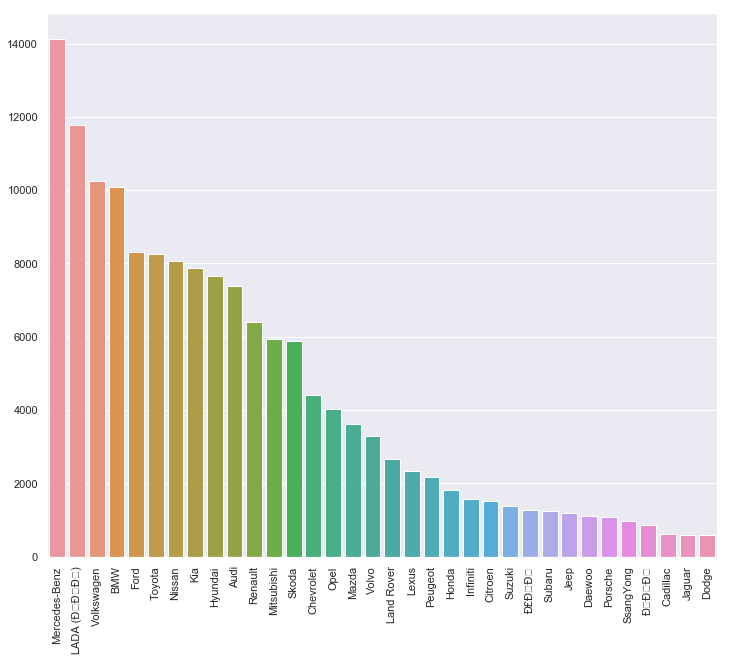

In [20]:
sns.set(rc={'figure.figsize':(12,10)})
g = sns.barplot(x=names[sorted_ix], y=counts[sorted_ix])
g.set_xticklabels(names[sorted_ix], rotation = 90);

# 4. Kaggle

_Пока не успел, всё время ушло на борьбу с Яндексом)_